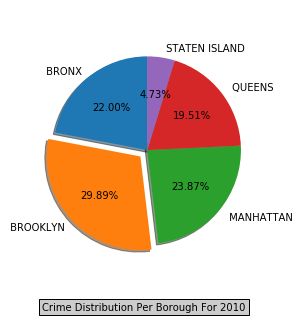

In [199]:
import re
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

year=2010

def plotgraph(data):
    lists = sorted(data.items()) # sorted by key, return a list of tuples
    bourough, frequency = zip(*lists) # unpack a list of pairs into two tuples
    
    #Plot data
    fig = plt.figure(figsize=(5,3))
    ax = fig.add_axes((0,0,0.5,1))
    ax.set_xlabel('Crime Distribution Per Borough For '+str(year),bbox={'facecolor':'0.8', 'pad':3}) 
    explode = (0, 0.1, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    plt.pie(frequency, explode=explode, labels=bourough, autopct='%1.2f%%',
        shadow=True, startangle=90)  
    plt.axis('equal')
    fig = plt.gcf()
    fig.set_size_inches(6,4)
    fig.savefig("crime-plots-borough/crime_all_borough_per"+str(year)+".png")
    
    plt.show()

with open("crime-data-by-borough/crime-bourough-per-year.out") as ins:
    year_boro_dict={}
    
    for line in ins:
        tuple=line.replace("'","").replace('(',"").replace(')',"").split(',')
        boro_freq_dict={}
        yr=int(tuple[0])
        boro=tuple[1]
        freq=int(tuple[2])
      
        if yr in year_boro_dict:
            boro_freq_dict = year_boro_dict.get(yr)  
            boro_freq_dict[boro]=freq
            year_boro_dict[yr]=boro_freq_dict
        else:     
            boro_freq_dict[boro]=freq
            year_boro_dict[yr]=boro_freq_dict
      
    try:
        data = year_boro_dict.get(year)
        plotgraph(year_boro_dict.get(year))
    except Exception as e:
        print('Input valid date between 2005 to 2016')
        
    year_boro_dict={}